In [2]:
# requird python modules and functions
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

In [3]:
# Getting required fits file of image
filename = get_pkg_data_filename('GMRT-DR1.fits')
fits.info(filename)

Filename: GMRT-DR1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     120   (300, 300)   float32   


In [4]:
# extract the information of fits file image and reading
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
print(wcs)
print(hdu)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 121.49004291666668  -37.47419  
CRPIX : 150.5  150.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0003333333333333334  0.0003333333333333334  
NAXIS : 300  300


In [5]:
# read the image data from this first extension using the keyword argument 
image_data = fits.getdata(filename, ext=0)

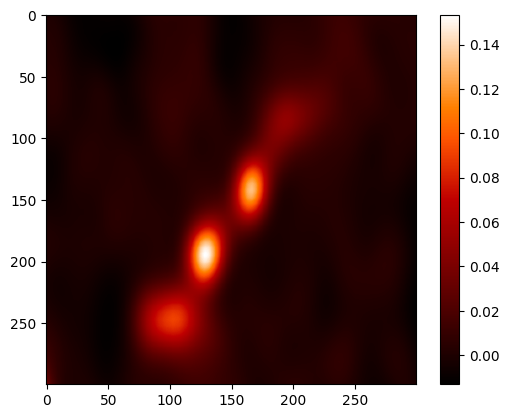

In [6]:
# Display the image data:
plt.figure()
plt.imshow(image_data, cmap='gist_heat')
plt.colorbar()

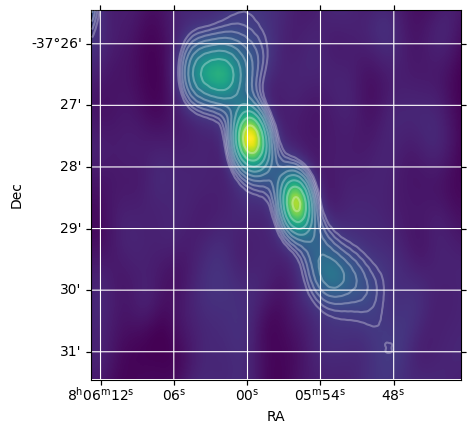

In [39]:
# Applying wcs object to given fits file image
ax = plt.subplot(projection=wcs)
ax.imshow(image_data, origin='lower')
ax.grid(color='white', ls='solid')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
# adding contours to the corresponding fits file image
ax.contour(image_data, levels=np.logspace(-1.834, 0.9671, 25), colors='white', alpha=0.3)

In [41]:
# Adding contours to the corresponding fits file image and store the resulting QuadContourSet
cn = ax.contour(image_data, levels=np.logspace(-1.834, 0.9671, 25), colors='white', alpha=0.5)

In [42]:
# Display values of contour
ax.clabel(cn, inline=True, fontsize=10)

<a list of 11 text.Text objects>

In [43]:
# Print the contour levels
print("Contour Levels: ", cn.levels)
ax.set_title('Contour scaling')

Contour Levels:  [0.01465548 0.01917399 0.02508563 0.03281992 0.04293881 0.05617751
 0.07349791 0.09615846 0.12580561 0.16459343 0.21534014 0.28173286
 0.36859548 0.48223919 0.63092102 0.82544378 1.07994093 1.4129035
 1.8485236  2.41845215 3.16409854 4.13963929 5.41595441 7.08577732
 9.27043258]


Text(0.5, 1.0, 'Contour scaling')